# How many yelp reviews does Burger King have if it has 300 google reviews

I will be using a comparative study in order to figure out the number of yelp reviews a restaurant has compared to 300 google reviews (retrospective study, examining the reviews already made of A Dave's Hot Chicken.

The Origins of our data set is that it was hand picked, we looked at different burger king reviews accross colorado and imported them into the data set. A selection bias could occur when selecting data where certain types of data were chosen over other types

File not found at: burgertron.csv
Current working directory: /home/b5ab8eb2-619f-42d0-ab91-5a1f5bcac94c
Available files: ['.pythonstartup.py', 'README.ipynb', '.config', '.bashrc', '.profile', '.conda', '.anaconda', '.cache', '.local', 'Burger.ipynb', '.ipynb_checkpoints', '.npm', '.vimrc', 'Titanic', '.ipython', 'Pokemon', 'Spotify', '.gitconfig', 'anaconda_projects', '.virtualenvs', '.jupyter']
Found file at: ./Pokemon/burgertron.csv

Missing values:
Google Reviews    0
Yelp Reviews      0
dtype: int64


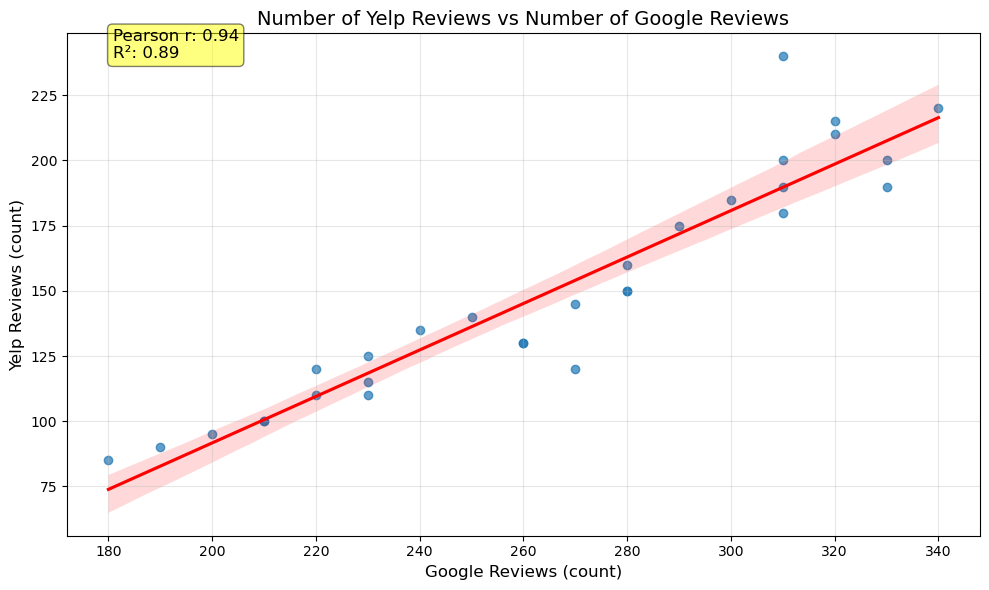

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = "burgertron.csv"

if not os.path.exists(file_path):
    print(f"File not found at: {file_path}")
    print(f"Current working directory: {os.getcwd()}")
    print("Available files:", os.listdir())
    # Search subdirectories
    for root, dirs, files in os.walk('.'):
        if 'burgertron.csv' in files:
            file_path = os.path.join(root, 'burgertron.csv')
            print(f"Found file at: {file_path}")
            break

# Read CSV
burger_data = pd.read_csv(file_path)

# Columns for number of reviews
google_reviews_col = 'Google Reviews'
yelp_reviews_col = 'Yelp Reviews'

# Check for missing values
print("\nMissing values:")
print(burger_data[[google_reviews_col, yelp_reviews_col]].isnull().sum())

# Drop rows with missing values in those columns
burger_data = burger_data[[google_reviews_col, yelp_reviews_col]].dropna()

# --- Compute Pearson correlation coefficient ---
pearson_r = burger_data[google_reviews_col].corr(burger_data[yelp_reviews_col])

# --- Compute coefficient of determination (R²) ---
r_squared = pearson_r ** 2

# --- Scatterplot with regression line ---
plt.figure(figsize=(10, 6))
sns.regplot(
    data=burger_data,
    x=google_reviews_col,
    y=yelp_reviews_col,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'}
)

# Annotate both metrics on the plot
plt.title('Number of Yelp Reviews vs Number of Google Reviews', fontsize=14)
plt.xlabel('Google Reviews (count)', fontsize=12)
plt.ylabel('Yelp Reviews (count)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.annotate(f"Pearson r: {pearson_r:.2f}\nR²: {r_squared:.2f}",
             xy=(0.05, 0.95),
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))

plt.tight_layout()
plt.show()


# there is a slight outlier at x=310 , I do not plan on removing this point for my analysis

The correlation coefficient between google review count and yelp review count from burger kings across colorado is .94, meaning there is a strong positive correlation.

The coefficient of determination is .89 meaning that 89% of the variation in Yelp reviews can be predicted by the number of Google reviews.